In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict
import seaborn as sns
%matplotlib inline
import baltic as bt
import numpy as np
import pickle
from copy import deepcopy

In [3]:
out_path = './png/'
colors = pickle.load(open('./colors.p', 'r'))

In [4]:
tree_file = '../data/augur-output/dengue_allBranchEffects_tree.json'
titer_tree = bt.loadJSON(tree_file, {'name': 'clade', 'height': 'cTiter'})
div_tree = bt.loadJSON(tree_file, {'name': 'clade', 'height': 'xvalue'})


Tree height: 1.955144
Tree length: 6.071398
annotations present

Numbers of objects in tree: 4792 (2230 nodes and 2562 leaves)


Tree height: 0.335580
Tree length: 7.088900
annotations present

Numbers of objects in tree: 4792 (2230 nodes and 2562 leaves)



In [16]:
clade_labels = 'abcdefghijklmnopqrstuvwxyz'

antigenic_clades = {}

label_idx = 0
for k in sorted(titer_tree.Objects, key=lambda k: -1*k.height):
    if k.traits['dTiter'] > 0.01:
        label_idx += 1
    label = clade_labels[label_idx]
    antigenic_clades[k.index] = label
    
all_clades = sorted(list(set(antigenic_clades.values())))

In [17]:
def plot_tree(ll, ax, cmap=colors['cmap']):
    sns.set(style='white')

    branchWidth = 3
    seen = []
    
    cmap = plt.get_cmap('Set2')
    color_vals = [cmap(n) for n in np.linspace(0,1,len(all_clades))]
    colors = { label: color for label, color in zip(all_clades, color_vals)}

    for k in ll.Objects: # Plot objects
        x=k.x 
        y=k.y 

        xp=k.parent.x 
        yp=k.parent.y
        if x==None:
            x=0.0
        if xp==None:
            xp=x

        clade = antigenic_clades[k.index]
        c = colors[clade]
        label = clade

        z=10
        if k.branchType == 'leaf':
            s=20
            ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
            ax.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
            if clade not in seen:
                ax.text(x+0.05, y, label, ha='left', va='center')
                seen.append(clade)

        elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
            plt.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=z-1)
            
        plt.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=z-1)

    ax.spines['top'].set_visible(False) ## no axes
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.tick_params(axis='x',size=0) ## no labels
    ax.tick_params(axis='y',size=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

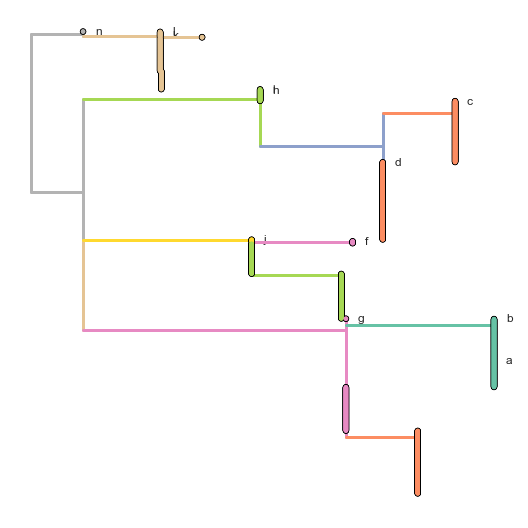

In [18]:
sns.set(style='white', font_scale=1.2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5)) # quarter page

plot_tree(titer_tree, ax=ax)#, cmap=cmap)

plt.tight_layout()
plt.show()

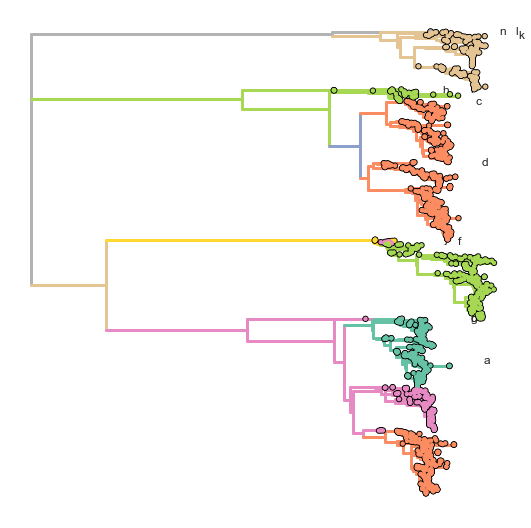

In [19]:
sns.set(style='white', font_scale=1.2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5)) # quarter page

plot_tree(div_tree, ax=ax)#, cmap=cmap)

plt.tight_layout()
plt.show()

In [31]:
# def find_mrca(tree, include):  
    
#     path_to_root = []
#     k = include[0]
#     while k.parent:
#         path_to_root.append(k)
#         k = k.parent
    
#     for k in path_to_root:
#         subtree = tree.traverse_tree(k, include_all=True)
#         if all([w in subtree for w in include]):
#             print k
#             return k
    
# def path_to_mrca(k, mrca):
#     path = []
#     while k.parent and k.parent != mrca:
#         path.append(k)
#         k = k.parent
#     return path
    
# def collapseSubtree(tree,include,name):
    
#     mrca = find_mrca(tree,include)
    
#     collapsedClade=bt.clade(name)
#     collapsedClade.index=mrca.index
#     collapsedClade.length=mrca.length
#     collapsedClade.height=mrca.height
#     collapsedClade.parent=mrca.parent
#     collapsedClade.absoluteTime=mrca.absoluteTime
#     collapsedClade.traits=mrca.traits
#     collapsedClade.width=1

#     parent=mrca.parent
    
#     not_included = [i for i in tree.traverse_tree(mrca) if i not in include]
    
#     for k in include:
#         problem_children = set(path_to_mrca(k, mrca)).intersection(set(not_included))
#         if len(problem_children) > 0:
#             print len(problem_children)
# #     remove_from_tree=self.traverse_tree(cl,include_all=True)
# #     collapsedClade.subtree=remove_from_tree
# #     assert len(remove_from_tree)<len(self.Objects),'Attempted collapse of entire tree'
# #     collapsedClade.lastHeight=max([x.height for x in remove_from_tree])
# #     collapsedClade.lastAbsoluteTime=max([x.absoluteTime for x in remove_from_tree])

# #     for k in remove_from_tree:
# #         self.Objects.remove(k)

# #     parent.children.remove(cl)
# #     parent.children.append(collapsedClade)
# #     self.Objects.append(collapsedClade)
# #     collapsedClade.parent=parent
# #     if self.tipMap!=None:
# #         self.tipMap[givenName]=givenName

# #     self.traverse_tree()
# #     self.sortBranches()

# for name, clade in antigenic_clades.items():
#     print name
#     collapseSubtree(titer_tree, clade, name)
# # collapseSubtree(titer_tree, antigenic_clades['a'], 'a')

a
<baltic.node instance at 0x115ba3dd0>
c
<baltic.node instance at 0x115a81320>
b
<baltic.node instance at 0x115b797a0>
e
<baltic.node instance at 0x115a8d440>
d
<baltic.node instance at 0x115a81320>
g
<baltic.node instance at 0x115b79488>
f
<baltic.node instance at 0x115b21f38>
i
<baltic.node instance at 0x115a81320>
h
<baltic.node instance at 0x115a81320>
k
<baltic.node instance at 0x115a41170>
j
<baltic.node instance at 0x115b24050>
m
<baltic.node instance at 0x115a81320>
l
<baltic.node instance at 0x115a0bef0>
n
<baltic.node instance at 0x115a0bef0>


In [15]:
div_tree = deepcopy(titer_tree)
for k in div_tree.Objects:
    k.height = k.traits['xvalue']
div_tree.drawTree()

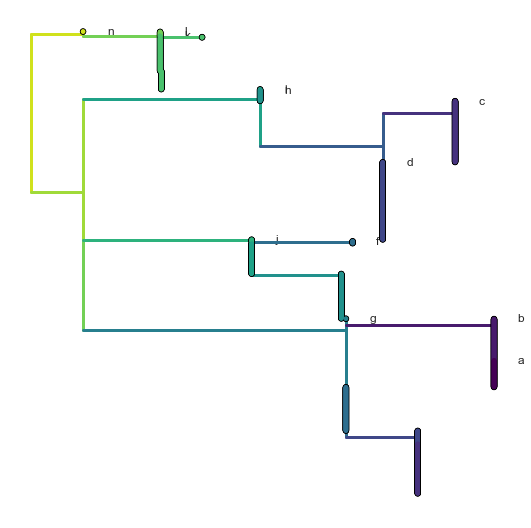

In [16]:
sns.set(style='white', font_scale=1.2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5)) # quarter page

plot_tree(div_tree, ax=ax)#, cmap=cmap)

plt.tight_layout()
plt.show()